In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## Import data from https://data.cityofnewyork.us/City-Government/2010-Census-Tracts/fxpq-c8ku
## Shapefile enables plotting of census tracts, neighborhoods, borough, etc. by coordinates
census_tract_shapes = gpd.read_file('data/geo_export_e2cd3cf8-21c0-468e-9274-ad3af1e7d5c9.shp')

In [3]:
nyc_tree = pd.read_csv('data/2015_Street_Tree_Census_-_Tree_Data.csv')
nyc_tree = nyc_tree.loc[nyc_tree.status == 'Alive'] 

In [4]:
## Allows for counting of rows when using groupby function
nyc_tree['counter'] = 1

In [20]:
nyc_tree.health.value_counts()

Good    528850
Fair     96504
Poor     26818
Name: health, dtype: int64

In [23]:
nyc_tree['good_health_tree'] = nyc_tree.health.apply(lambda x: 1 if x=='Good' else 0)
nyc_tree['fair_health_tree'] = nyc_tree.health.apply(lambda x: 1 if x=='Fair' else 0)
nyc_tree['poor_health_tree'] = nyc_tree.health.apply(lambda x: 1 if x=='Poor' else 0)

In [24]:
## Reduce number of shapes from 2165 census tracts to 195 neighborhoods
neighborhood_shapes = census_tract_shapes.dissolve(by='ntaname')

In [25]:
neighborhood_trees = nyc_tree.groupby('nta_name').sum()

In [26]:
## Join shape dataset and tree dataset on neighborhood name indexes
trees_by_neighborhood = neighborhood_trees.join(neighborhood_shapes)

In [27]:
trees_by_neighborhood = gpd.GeoDataFrame(trees_by_neighborhood)

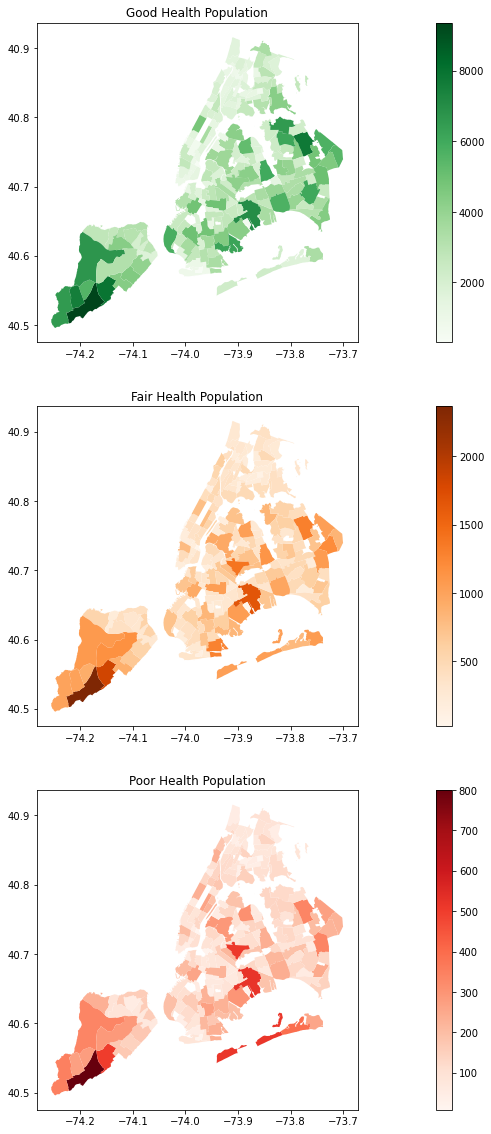

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(28, 20))
ax1 = (trees_by_neighborhood.plot(ax=ax1, column='good_health_tree', legend=True, cmap='Greens')
                            .set_title('Good Health Population'))
ax2 = (trees_by_neighborhood.plot(ax=ax2, column='fair_health_tree', legend=True, cmap='Oranges')
                            .set_title('Fair Health Population'))
ax3 = (trees_by_neighborhood.plot(ax=ax3, column='poor_health_tree', legend=True, cmap='Reds')
                            .set_title('Poor Health Population'));